In [5]:
from autocluster import AutoCluster
from sklearn import datasets
from collections import Counter
from utils.metafeatures import MetafeatureMapper
from sklearn.metrics.cluster import v_measure_score
import pandas as pd

%load_ext autoreload
%autoreload 2|

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
df = pd.DataFrame(datasets.load_digits()['data'])
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
cluster = AutoCluster()
fit_params = {
    "df": df, 
    "cluster_alg_ls": ['MiniBatchKMeans', 'KMeans'],
    "dim_reduction_alg_ls": ['PCA', 'TSNE', 'FastICA'],
    "n_evaluations": 20,
    "run_obj": 'quality',
    "seed": 27,
    "cutoff_time": 50,
    "preprocess_dict": {
        "numeric_cols": list(range(64)),
        "categorical_cols": [],
        "ordinal_cols": [],
        "y_col": []
    },
    "warmstart": False,
    "general_metafeatures": MetafeatureMapper.getGeneralMetafeatures(),
    "numeric_metafeatures": MetafeatureMapper.getNumericMetafeatures(),
    "categorical_metafeatures": MetafeatureMapper.getCategoricalMetafeatures(),
}
result_dict = cluster.fit(**fit_params)

1346/1797 datapoints remaining after outlier removal
Configuration space object:
  Hyperparameters:
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    batch_size___MiniBatchKMeans, Type: UniformInteger, Range: [10, 1000], Default: 100
    clustering_choice, Type: Categorical, Choices: {MiniBatchKMeans, KMeans}, Default: MiniBatchKMeans
    dim_reduction_choice, Type: Categorical, Choices: {PCA, TSNE, FastICA}, Default: PCA
    early_exaggeration___TSNE, Type: UniformFloat, Range: [5.0, 20.0], Default: 12.0
    fun___FastICA, Type: Categorical, Choices: {logcosh, exp, cube}, Default: logcosh
    n_clusters___KMeans, Type: UniformInteger, Range: [1, 30], Default: 5
    n_clusters___MiniBatchKMeans, Type: UniformInteger, Range: [1, 30], Default: 10
    n_components___FastICA, Type: Ordinal, Sequence: {2, 3}, Default: 2
    n_components___PCA, Type: Ordinal, Sequence: {2, 3}, Default: 2
    n_components___TSNE, Type: Ordinal, Sequence: {2}, De

/home/wywongbd/coding_workspace/autocluster/autocluster/utils/metafeatures.py:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.count_nonzero(X == None) + np.count_nonzero(X == '')
/home/wywongbd/coding_workspace/autocluster/autocluster/utils/metafeatures.py:43: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return (np.count_nonzero(X == '') + np.count_nonzero(X == 0)) / X.size
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Truncated n_evaluations: 20
{'run_obj': 'quality', 'output_dir': 'log//smac-2019-07-25_21-02-12-79918', 'abort_on_first_run_crash': False, 'deterministic': 'true', 'cutoff_time': 50, 'runcount-limit': 20, 'cs': Configuration space object:
  Hyperparameters:
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    batch_size___MiniBatchKMeans, Type: UniformInteger, Range: [10, 1000], Default: 100
    clustering_choice, Type: Categorical, Choices: {MiniBatchKMeans, KMeans}, Default: MiniBatchKMeans
    dim_reduction_choice, Type: Categorical, Choices: {PCA, TSNE, FastICA}, Default: PCA
    early_exaggeration___TSNE, Type: UniformFloat, Range: [5.0, 20.0], Default: 12.0
    fun___FastICA, Type: Categorical, Choices: {logcosh, exp, cube}, Default: logcosh
    n_clusters___KMeans, Type: UniformInteger, Range: [1, 30], Default: 5
    n_clusters___MiniBatchKMeans, Type: UniformInteger, Range: [1, 30], Default: 10
    n_components___FastICA, Type: Ordin

/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Fitting configuration: 
{'svd_solver___PCA': 'auto', 'clustering_choice': 'MiniBatchKMeans', 'batch_size___MiniBatchKMeans': 100, 'n_clusters___MiniBatchKMeans': 10, 'n_components___PCA': 2, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: -0.3452395207193249
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'early_exaggeration___TSNE': 10.00880003698143, 'batch_size___MiniBatchKMeans': 605, 'n_clusters___MiniBatchKMeans': 5, 'dim_reduction_choice': 'TSNE', 'n_components___TSNE': 2, 'perplexity___TSNE': 28.12416101553896}
Score obtained by this configuration: -0.4860309958457947
Fitting configuration: 
{'svd_solver___PCA': 'randomized', 'clustering_choice': 'MiniBatchKMeans', 'batch_size___MiniBatchKMeans': 153, 'n_clusters___MiniBatchKMeans': 15, 'n_components___PCA': 2, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: -0.3465782909605977
Fitting configuration: 
{'n_clusters___KMeans': 25, 'clustering_choice': 'KMeans', 'n_compone

Fitting configuration: 
{'n_clusters___KMeans': 1, 'n_components___FastICA': 2, 'clustering_choice': 'KMeans', 'fun___FastICA': 'cube', 'algorithm___FastICA': 'deflation', 'dim_reduction_choice': 'FastICA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_clusters___KMeans': 19, 'n_components___PCA': 3, 'dim_reduction_choice': 'PCA', 'svd_solver___PCA': 'randomized', 'clustering_choice': 'KMeans'}
Score obtained by this configuration: -0.2882445685784606
Fitting configuration: 
{'n_clusters___KMeans': 27, 'clustering_choice': 'KMeans', 'n_components___PCA': 2, 'dim_reduction_choice': 'PCA', 'svd_solver___PCA': 'randomized', 'whiten___PCA': True}
Score obtained by this configuration: -0.3581003163526545
Fitting configuration: 
{'n_clusters___KMeans': 18, 'clustering_choice': 'KMeans', 'n_components___PCA': 3, 'dim_reduction_choice': 'PCA', 'svd_solver___PCA': 'randomized', 'whiten___PCA': True}
Score obtained by this configuration: -0.29461188738210303
Fitting configuration: 
{'n_clusters___KMeans': 19, 'clustering_choice': 'KMeans', 'n_components___PCA': 2, 'dim_reduction_choice': 'PCA', 'svd_solver___PCA': 'randomized', 'whiten___PCA': True}
Score obtained by this configuration: -0.3537257466415099
Fitting c

In [12]:
result_dict['metafeatures'][0]

array([0, 0.0, 1346.0, 7.204892510204673, 0.4899006315007429,
       0.9283739834879946, 1341.0007434944248, 36.6469745476282,
       0.1995017593088704, -0.43307279727348547, 0.2307992670198616,
       -1.3939034989101657, 0.0058019779414867296, 110.13244127992976,
       -0.24582095597838421, -19.79855775338742, -1.3878656463764931,
       -0.6710337486547091, 0.4899006315007429, -0.08700476192762688,
       -0.00984213591775663, 4.360847039239927, 0.05936186813822542, 0.0,
       6.781202720584854, -0.8286752647835578, -3.0, 42.342438838469526,
       0.3008141965842963, 0.026439156224439663, 2.5401996920495673,
       0.4375, -0.5956717271932382, None, None, None, None, None, None],
      dtype=object)

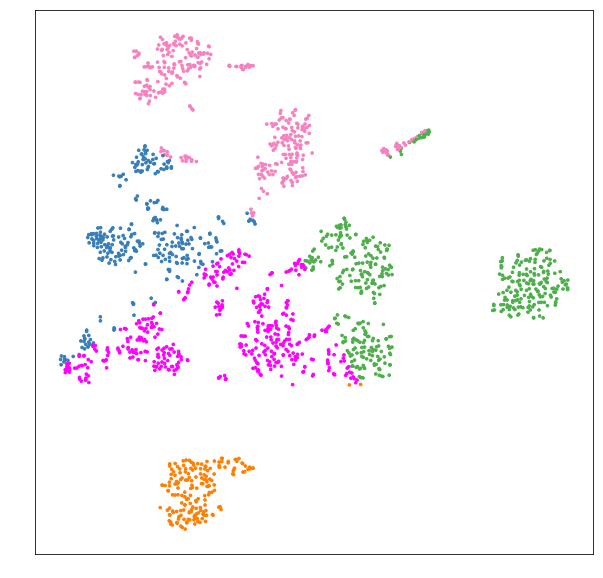

In [4]:
predictions = cluster.predict(df)

In [72]:
Counter(predictions)

Counter({0: 1796, 1: 1})

In [73]:
1 /  1797

0.0005564830272676684

In [65]:
v_measure_score(predictions, datasets.load_digits()['target'])

0.4962909734393218